In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import global_variables as gv

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [3]:
df1 = pd.read_csv('data/preprocessed-ukb46359.csv')
df1.drop('Unnamed: 0', axis=1, inplace=True)

df = pd.read_csv('data/imputed_ukb46359.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.rename(columns = {'outcome_hypertension':'hypertension'}, inplace=True)
df['age'] = df1['21003-0.0']
df

,30850-0.0,30780-0.0,30690-0.0,1488-0.0,30790-0.0,1418-0.0,1329-0.0,4079-0.0,1220-0.0,23101-0.0,...,outcome_myocardial_infarction,outcome_cardiomyopathies,outcome_ischemic_heart_disease,outcome_heart_failure,hypertension,outcome_peripheral_vascular_disease,outcome_cardiac_arrest,outcome_cerebral_infarction,outcome_arrhythmia,age
0,0.50800,3.88800,6.47700,6.0,65.1984,3.0,2.0,77.0,0.0,45.2,...,0,0,0,0,0,0,0,0,1,54.0
1,13.08800,3.52000,5.51200,2.0,15.4000,2.0,2.0,91.0,0.0,74.6,...,1,0,1,0,1,0,0,0,0,65.0
2,4.67500,3.04100,5.02800,5.0,48.9353,2.0,3.0,84.0,0.0,79.6,...,0,0,0,0,0,0,0,0,0,66.0
3,9.73364,4.10892,6.47949,0.0,50.8588,2.0,1.0,99.0,0.0,71.7,...,0,0,1,0,1,0,1,1,1,55.0
4,1.78800,2.88700,5.56500,0.0,56.5183,2.0,2.0,71.0,0.0,40.2,...,0,0,0,0,0,0,0,0,1,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101724,1.09949,3.87500,6.19000,0.0,169.2000,2.0,0.0,82.0,1.0,46.9,...,0,0,0,0,1,0,0,1,1,68.0
101725,9.03600,2.46700,4.03500,0.0,44.6578,1.0,1.0,90.0,0.0,66.3,...,0,0,0,1,1,0,0,0,0,58.0
101726,0.48500,3.80200,6.50700,4.0,45.3675,2.0,3.0,69.0,0.0,41.6,...,0,0,1,0,0,0,0,0,0,57.0
101727,0.72500,2.86300,4.66400,0.0,5.0900,3.0,1.0,73.0,0.0,44.9,...,0,0,1,0,1,0,0,0,0,64.0


In [4]:
df.columns

Index(['30850-0.0', '30780-0.0', '30690-0.0', '1488-0.0', '30790-0.0',
       '1418-0.0', '1329-0.0', '4079-0.0', '1220-0.0', '23101-0.0', '1428-0.0',
       '1249-0.0', '1349-0.0', '23099-0.0', '48-0.0', '1369-0.0', '23100-0.0',
       '20117-0.0', '1299-0.0', '2100-0.0', '21003-0.0', '30710-0.0',
       '1160-0.0', '30760-0.0', '1438-0.0', '2654-0.0', '4080-0.0',
       '30640-0.0', '1339-0.0', '30750-0.0', '21000-0.0', '2050-0.0',
       '1408-0.0', '49-0.0', '1200-0.0', '30770-0.0', '1538-0.0', '1458-0.0',
       '31-0.0', '1528-0.0', '1319-0.0', '30740-0.0', '6138-0.0', '1359-0.0',
       '1389-0.0', '1478-0.0', '2090-0.0', '1508-0.0', '845-0.0', '1379-0.0',
       '6142-0.0', '1468-0.0', '1289-0.0', '1548-0.0', '30630-0.0',
       '30870-0.0', '1239-0.0', '21001-0.0', '1309-0.0', '1448-0.0',
       'outcome_myocardial_infarction', 'outcome_cardiomyopathies',
       'outcome_ischemic_heart_disease', 'outcome_heart_failure',
       'hypertension', 'outcome_peripheral_vascular_disea

In [ ]:
outcomes = ['outcome_myocardial_infarction','outcome_cardiomyopathies','outcome_ischemic_heart_disease','outcome_heart_failure','outcome_peripheral_vascular_disease','outcome_cardiac_arrest','outcome_cerebral_infarction','outcome_arrhythmia']


categorical_cols = ['1418','1329','1220','1428','1249','1349','1369','20117','2100','2654','1339','21000','2050','1408','1200','1538','31','6138','1359','1389','1478','2090','1508','1379','6142','1468','1548','1239','1448']
numerical_cols = ['1488','4079','1299','21003','1160','1438','4080','1458','1528','1319','845','1289','1309']
continuous_cols = ['30850','30780','30690','30790','23101','23099','48','23100','30710','30760','30640','30750','49','30770','30740','30630','30870','21001']

categorical_cols = [s + '-0.0' for s in categorical_cols]
numerical_cols = [s + '-0.0' for s in numerical_cols]
continuous_cols = [s + '-0.0' for s in continuous_cols]

categorical_cols=categorical_cols+['hypertension']

In [5]:
for col in gv.categorical_cols+['age']:
    if col in df.columns:
        df[col] = df[col].fillna(0).astype(int)
    else:
        continue
    
# create multi-label output column

for outcome in gv.outcomes:
    df[outcome] = df[outcome].fillna(0).astype(int)

df['hypertension'] = df['hypertension'].fillna(0).astype(int)
df['multi-labels'] = df[gv.outcomes].values.tolist()
df

,30850-0.0,30780-0.0,30690-0.0,1488-0.0,30790-0.0,1418-0.0,1329-0.0,4079-0.0,1220-0.0,23101-0.0,...,outcome_cardiomyopathies,outcome_ischemic_heart_disease,outcome_heart_failure,hypertension,outcome_peripheral_vascular_disease,outcome_cardiac_arrest,outcome_cerebral_infarction,outcome_arrhythmia,age,multi-labels
0,0.50800,3.88800,6.47700,6.0,65.1984,3,2,77.0,0,45.2,...,0,0,0,0,0,0,0,1,54,"[0, 0, 0, 0, 0, 0, 0, 1]"
1,13.08800,3.52000,5.51200,2.0,15.4000,2,2,91.0,0,74.6,...,0,1,0,1,0,0,0,0,65,"[1, 0, 1, 0, 0, 0, 0, 0]"
2,4.67500,3.04100,5.02800,5.0,48.9353,2,3,84.0,0,79.6,...,0,0,0,0,0,0,0,0,66,"[0, 0, 0, 0, 0, 0, 0, 0]"
3,9.73364,4.10892,6.47949,0.0,50.8588,2,1,99.0,0,71.7,...,0,1,0,1,0,1,1,1,55,"[0, 0, 1, 0, 0, 1, 1, 1]"
4,1.78800,2.88700,5.56500,0.0,56.5183,2,2,71.0,0,40.2,...,0,0,0,0,0,0,0,1,49,"[0, 0, 0, 0, 0, 0, 0, 1]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101724,1.09949,3.87500,6.19000,0.0,169.2000,2,0,82.0,1,46.9,...,0,0,0,1,0,0,1,1,68,"[0, 0, 0, 0, 0, 0, 1, 1]"
101725,9.03600,2.46700,4.03500,0.0,44.6578,1,1,90.0,0,66.3,...,0,0,1,1,0,0,0,0,58,"[0, 0, 0, 1, 0, 0, 0, 0]"
101726,0.48500,3.80200,6.50700,4.0,45.3675,2,3,69.0,0,41.6,...,0,1,0,0,0,0,0,0,57,"[0, 0, 1, 0, 0, 0, 0, 0]"
101727,0.72500,2.86300,4.66400,0.0,5.0900,3,1,73.0,0,44.9,...,0,1,0,1,0,0,0,0,64,"[0, 0, 1, 0, 0, 0, 0, 0]"


In [ ]:
# protected_attributes
# sex (encoding 9)

# ethnic background (encoding 1001)
protected_attributes = ['31-0.0',  '21000-0.0'] # age 21003-0.0

# mappings
sex = {1.0:'Male', 
       0.0:'Female'
}

race = {1001.0:'British',
        1003.0:'Any other white background',
        1002.0:'Irish',
        3001.0:'Indian',
        6.0:'Other ethnic group',
        4001.0:'Caribbean',
        3002.0 :'Pakistani',
        4002.0 :'African',
        3004.0  :'Any other Asian background',
        1.0:'White',
        5.0:'Chinese',
        2004.0:'Any other mixed background',
        2003.0:'White and Asian',
        2001.0:'White and Black Caribbean',
        3003.0:'Bangladeshi',
        2002.0:'White and Black African',
        2.0:'Mixed',
        3.0:'Asian or Asian British',
        4003.0:'Any other Black background',
        4.0:'Black or Black British'    
}

In [6]:
df2 = df[gv.protected_attributes+gv.outcomes]

In [7]:
df2.head()

,31-0.0,21000-0.0,outcome_myocardial_infarction,outcome_cardiomyopathies,outcome_ischemic_heart_disease,outcome_heart_failure,outcome_peripheral_vascular_disease,outcome_cardiac_arrest,outcome_cerebral_infarction,outcome_arrhythmia
0,0,1001,0,0,0,0,0,0,0,1
1,1,1001,1,0,1,0,0,0,0,0
2,1,1001,0,0,0,0,0,0,0,0
3,1,1001,0,0,1,0,0,1,1,1
4,0,1002,0,0,0,0,0,0,0,1


In [9]:
df['gender'] = df['31-0.0'].map(gv.sex_mapping)
df['race'] = df['21000-0.0'].map(gv.race_mapping)

In [10]:
df.head()

,30850-0.0,30780-0.0,30690-0.0,1488-0.0,30790-0.0,1418-0.0,1329-0.0,4079-0.0,1220-0.0,23101-0.0,...,outcome_heart_failure,hypertension,outcome_peripheral_vascular_disease,outcome_cardiac_arrest,outcome_cerebral_infarction,outcome_arrhythmia,age,multi-labels,gender,race
0,0.50800,3.88800,6.47700,6.0,65.1984,3,2,77.0,0,45.2,...,0,0,0,0,0,1,54,"[0, 0, 0, 0, 0, 0, 0, 1]",Female,British
1,13.08800,3.52000,5.51200,2.0,15.4000,2,2,91.0,0,74.6,...,0,1,0,0,0,0,65,"[1, 0, 1, 0, 0, 0, 0, 0]",Male,British
2,4.67500,3.04100,5.02800,5.0,48.9353,2,3,84.0,0,79.6,...,0,0,0,0,0,0,66,"[0, 0, 0, 0, 0, 0, 0, 0]",Male,British
3,9.73364,4.10892,6.47949,0.0,50.8588,2,1,99.0,0,71.7,...,0,1,0,1,1,1,55,"[0, 0, 1, 0, 0, 1, 1, 1]",Male,British
4,1.78800,2.88700,5.56500,0.0,56.5183,2,2,71.0,0,40.2,...,0,0,0,0,0,1,49,"[0, 0, 0, 0, 0, 0, 0, 1]",Female,Irish


In [11]:
df2 = df[~((df['outcome_myocardial_infarction'] == 0) & (df['outcome_cardiomyopathies'] == 0) & (df['outcome_ischemic_heart_disease'] == 0) & (df['outcome_heart_failure'] == 0) & (df['outcome_peripheral_vascular_disease'] == 0) & (df['outcome_cardiac_arrest'] == 0) & (df['outcome_cerebral_infarction'] == 0) & (df['outcome_arrhythmia'] == 0))]

In [12]:
# switch 
# get a list of the columns
col_list = list(df)
# use this handy way to swap the elements
col_list[-13], col_list[-9], col_list[-4], col_list[-3]  = col_list[-9], col_list[-13], col_list[-3], col_list[-4]
# assign back, the order will now be swapped
df=df.loc[:,col_list]
df2=df2.loc[:,col_list]

In [13]:
# reorder cols to show continuous, numeric, and categorical cols grouped
cols= gv.continuous_cols+gv.numerical_cols+gv.categorical_cols
col_list2 = cols+list(df)[61:]
df=df.loc[:,col_list2]
df2=df2.loc[:,col_list2]

In [14]:
# ordinal encode race input

race = {1001:0,
        1003:1,
        1002:2,
        3001:3,
        6:4,
        4001:5,
        3002 :6,
        4002 :7,
        3004  :8,
        1:9,
        5:10,
        2004:11,
        2003:12,
        2001:13,
        3003:14,
        2002:15,
        2:16,
        3:17,
        4003:18,
        419: 19   
}

df['21000-0.0'] = df['21000-0.0'].map(race).fillna(0).astype(int)
df2['21000-0.0'] = df2['21000-0.0'].map(race).fillna(0).astype(int)

In [15]:
print(len(gv.continuous_cols))
print(len(gv.numerical_cols))
print(len(gv.categorical_cols))

18
13
30


In [16]:
pd.set_option('display.max_columns', None)

df2

,30850-0.0,30780-0.0,30690-0.0,30790-0.0,23101-0.0,23099-0.0,48-0.0,23100-0.0,30710-0.0,30760-0.0,30640-0.0,30750-0.0,49-0.0,30770-0.0,30740-0.0,30630-0.0,30870-0.0,21001-0.0,1488-0.0,4079-0.0,1299-0.0,21003-0.0,1160-0.0,1438-0.0,4080-0.0,1458-0.0,1528-0.0,1319-0.0,845-0.0,1289-0.0,1309-0.0,1418-0.0,1329-0.0,1220-0.0,1428-0.0,1249-0.0,1349-0.0,1369-0.0,20117-0.0,2100-0.0,2654-0.0,1339-0.0,21000-0.0,2050-0.0,1408-0.0,1200-0.0,1538-0.0,31-0.0,6138-0.0,1359-0.0,1389-0.0,1478-0.0,2090-0.0,1508-0.0,1379-0.0,6142-0.0,1468-0.0,1548-0.0,1239-0.0,1448-0.0,hypertension,outcome_cardiomyopathies,outcome_ischemic_heart_disease,outcome_heart_failure,outcome_myocardial_infarction,outcome_peripheral_vascular_disease,outcome_cardiac_arrest,outcome_cerebral_infarction,outcome_arrhythmia,multi-labels,age,gender,race
0,0.50800,3.88800,6.47700,65.1984,45.2,35.6,74.0,25.0,0.34,1.70600,1.21100,35.065,102.0,26.339,5.62200,1.59300,0.97700,24.5790,6.0,77.0,10.0,54.0,7.0,10.0,110.0,3.73,2.0,0.0,23.52,6.0,2.0,3,2,0,0,1,1,1,2,1,6,2,0,2,1,3,2,0,1,2,1,1,1,3,1,1,3,2,0,3,0,0,0,0,0,0,0,0,1,"[0, 0, 0, 0, 0, 0, 0, 1]",54,Female,British
1,13.08800,3.52000,5.51200,15.4000,74.6,36.5,120.0,42.9,3.94,1.17300,1.01900,40.900,113.0,10.701,5.05200,1.39000,2.35800,35.0861,2.0,91.0,2.0,65.0,9.0,12.0,166.0,7.00,2.4,0.0,16.00,2.0,1.0,2,2,0,1,1,4,2,2,0,7,2,0,1,3,2,0,1,3,3,1,1,0,2,2,1,5,2,0,1,1,0,1,0,1,0,0,0,0,"[1, 0, 1, 0, 0, 0, 0, 0]",65,Male,British
3,9.73364,4.10892,6.47949,50.8588,71.7,29.7,112.0,30.3,3.88,1.58546,1.22432,84.100,107.0,18.763,13.71763,1.74423,2.78764,30.7934,0.0,99.0,2.0,55.0,7.0,10.0,135.0,7.00,2.0,0.0,21.00,3.0,1.0,2,1,0,0,1,2,1,2,0,7,2,0,1,2,2,1,1,3,3,2,1,0,2,2,1,4,2,0,3,1,0,1,0,0,0,1,1,1,"[0, 0, 1, 0, 0, 1, 1, 1]",55,Male,British
4,1.78800,2.88700,5.56500,56.5183,40.2,29.8,67.0,17.0,0.87,2.11500,0.81000,36.400,91.0,31.672,4.82700,1.89100,1.15700,20.7577,0.0,71.0,5.0,49.0,8.0,14.0,116.0,5.00,3.0,1.0,18.00,5.0,1.0,2,2,0,0,4,1,2,2,0,7,2,2,1,2,1,2,0,6,2,2,1,0,2,2,1,3,2,0,3,0,0,0,0,0,0,0,0,1,"[0, 0, 0, 0, 0, 0, 0, 1]",49,Female,Irish
5,0.75600,2.67000,4.68000,4.7700,46.5,30.1,85.0,20.0,0.18,1.49300,0.73300,34.200,105.0,42.209,5.06300,1.86900,1.67700,25.9766,7.0,73.0,4.0,61.0,7.0,2.0,113.0,7.00,4.0,2.0,16.00,3.0,3.0,3,2,1,1,4,1,1,2,0,7,3,0,1,3,1,0,0,3,3,1,2,0,1,1,1,4,2,0,3,1,0,0,0,1,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0]",61,Female,British
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101724,1.09949,3.87500,6.19000,169.2000,46.9,35.8,94.0,26.2,3.83,1.00800,1.30600,24.500,109.0,16.010,4.60400,1.42100,5.14200,29.2822,0.0,82.0,3.0,68.0,7.0,8.0,151.0,5.00,6.0,1.0,15.00,6.0,2.0,2,0,1,3,2,3,2,2,0,8,3,0,1,1,2,0,0,3,1,1,1,0,1,2,2,4,3,0,3,1,0,0,0,0,0,0,1,1,"[0, 0, 0, 0, 0, 0, 1, 1]",68,Female,British
101725,9.03600,2.46700,4.03500,44.6578,66.3,36.9,114.0,38.7,2.24,1.08700,0.77300,32.100,110.0,22.351,3.79600,1.18800,1.01200,34.2857,0.0,90.0,1.0,58.0,5.0,26.0,129.0,1.00,0.0,0.0,15.00,4.0,2.0,1,1,0,3,3,3,1,2,0,4,3,0,1,2,2,0,1,5,2,1,2,0,2,1,1,4,1,0,2,1,0,0,1,0,0,0,0,0,"[0, 0, 0, 1, 0, 0, 0, 0]",58,Male,British
101726,0.48500,3.80200,6.50700,45.3675,41.6,37.1,82.0,24.5,0.52,1.85700,0.96900,32.800,106.0,21.654,5.03400,2.14200,2.15200,26.1461,4.0,69.0,3.0,57.0,8.0,7.0,140.0,7.00,3.0,0.0,16.00,1.0,0.0,2,3,0,3,4,1,1,2,0,6,2,0,1,2,3,0,0,4,2,1,2,1,2,1,1,2,2,0,3,0,0,1,0,0,0,0,0,0,"[0, 0, 1, 0, 0, 0, 0, 0]",57,Female,British
101727,0.72500,2.86300,4.66400,5.0900,44.9,46.3,102.0,38.7,2.75,1.15900,0.89800,33.200,110.0,23.647,5.67300,1.36500,2.13400,31.4652,0.0,73.0,3.0,64.0,6.0,4.0,148.0,7.00,3.0,0.0,16.00,4.0,6.0,3,1,0,1,1,1,2,1,0,2,1,0,1,1,3,2,0,3,3,2,2,1,1,2,2,1,3,0,3,1,0,1,0,0,0,0,0,0,"[0, 0, 1, 0, 0, 0, 0, 0]",64,Female,British


In [ ]:
df.to_csv('cleaned-outcomes-ukb46359.csv')
df2.to_csv('cleaned-outcomes-no-hypertension.csv')

### Visualize protected attribute distributions

In [17]:
df.columns
df['21000-0.0'].value_counts()

0     91518
2      2807
1      2691
3      1258
4       725
5       671
6       488
7       415
8       339
9       164
11      148
10      145
12      102
13       91
15       64
14       62
18       20
17       15
16        6
Name: 21000-0.0, dtype: int64

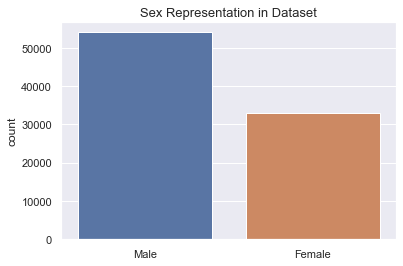

In [19]:
# define Seaborn color palette to use
sns.set_theme(style="darkgrid")
  
# plotting data on chart
ax = sns.countplot(x=df2['gender'],
                   order = df2['gender'].value_counts().index)
plt.title('Sex Representation in Dataset', fontsize=13)
plt.xlabel('')
plt.savefig('charts/sex_bar.png', bbox_inches='tight')

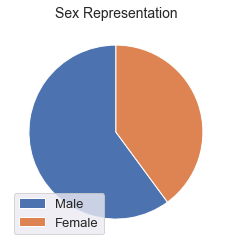

In [21]:
counts = df['gender'].value_counts()
labels = counts.index

#Plot pie chart
plt.pie(counts, startangle=90)
plt.legend(labels, loc=3,fontsize=13)
plt.title("Sex Representation",size=14)
plt.savefig('charts/sex_pie.png', bbox_inches='tight')

C:\Users\anali\AppData\Local\Temp/ipykernel_31148/2732465715.py:13: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)


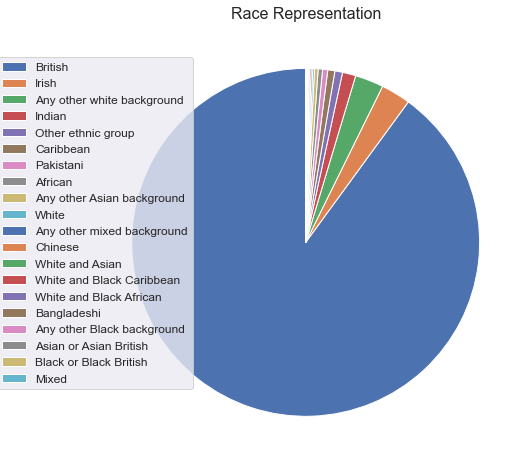

<Figure size 432x288 with 0 Axes>

In [23]:
counts2 = df['race'].value_counts()
labels2 = counts2.index

#Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(counts2, startangle=90)
leg = plt.legend(labels2, loc=3, fontsize=12)
plt.title("Race Representation",size=16)

plt.draw() # Draw the figure so you can find the positon of the legend. 

# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

# Change to location of the legend. 
xOffset = -0.26
bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform = ax.transAxes)


# Update the plot
plt.show()
plt.savefig('charts/race_pie.png', bbox_inches='tight')

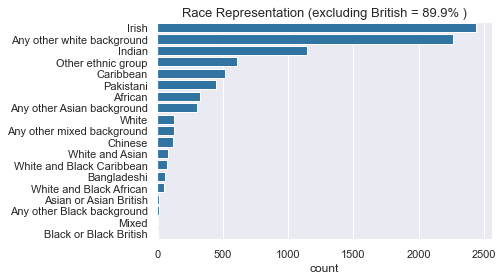

In [25]:
race_secondary = df2[df2['race'] != 'British']

ax = sns.countplot(y=race_secondary['race'],
                   color='tab:blue',
                   order = race_secondary['race'].value_counts().index)

plt.title('Race Representation (excluding British = 89.9% )', fontsize=13)
plt.ylabel('')

plt.savefig('charts/race_bar_exc_british.png', bbox_inches='tight')

In [26]:
(df2.shape[0] - race_secondary.shape[0])/df2.shape[0]

0.8993732390316831

In [28]:
df_counts = pd.DataFrame(columns = ['outcome', 'count'])

out_names = {'outcome_myocardial_infarction': 'Myocardial Infarction',
 'outcome_cardiomyopathies':'Cardiomyopathies',
 'outcome_ischemic_heart_disease':'Heart Disease',
 'outcome_heart_failure':'Heart Failure',
 'outcome_peripheral_vascular_disease':'Peripheral Vascular Disease',
 'outcome_cardiac_arrest':'Cardiac Arrest',
 'outcome_cerebral_infarction':'Cerebral Infarction',
 'outcome_arrhythmia':'Arrhythmia'
    
}

for outcome in gv.outcomes:   
    df_new = pd.DataFrame({'outcome':out_names[outcome], 'count':df2[outcome].sum()}, index=[0])
    df_counts = pd.concat([df_counts,df_new])
df_counts.head(10)

,outcome,count
0,Myocardial Infarction,22648
0,Cardiomyopathies,3434
0,Heart Disease,52870
0,Heart Failure,15327
0,Peripheral Vascular Disease,7800
0,Cardiac Arrest,2832
0,Cerebral Infarction,8319
0,Arrhythmia,46130


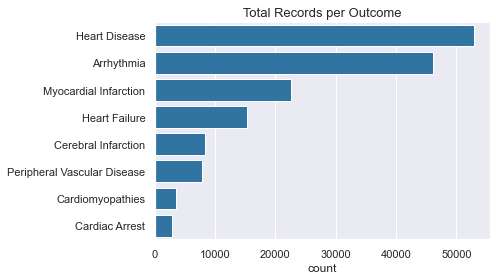

In [30]:
ax1 = sns.barplot(x='count',y='outcome',
            data=df_counts.sort_values('count', ascending=False),
            color='tab:blue')

plt.title('Total Records per Outcome', fontsize=13)
plt.ylabel('')
plt.savefig('charts/outcomes_bar.png', bbox_inches='tight')

[21474, 2965, 36234, 14646, 7181, 2335, 7506, 24198]


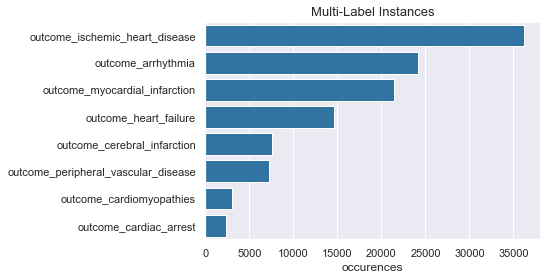

In [33]:
# find outcomes with multiple labels
multi_totals=[0,0,0,0,0,0,0,0]
for out in df2['multi-labels']:
    if sum(out)>1:
        multi_totals=[a+b for a,b in zip(out, multi_totals)]

print(multi_totals)

multi_table = pd.DataFrame(columns=['outcome', 'occurences'])
for name, total in zip(gv.outcomes,multi_totals):
    df_new = pd.DataFrame({'outcome':name, 'occurences':total}, index=[0])
    multi_table = pd.concat([multi_table,df_new])


ax1 = sns.barplot(x='occurences',y='outcome',
            data=multi_table.sort_values('occurences', ascending=False),
            color='tab:blue')

plt.title('Multi-Label Instances', fontsize=13)
plt.ylabel('')

plt.savefig('charts/multi_instances_bar.png', bbox_inches='tight')

C:\Users\anali\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


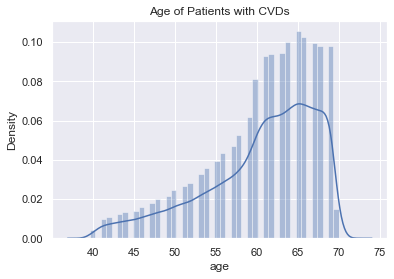

In [35]:
ax = sns.distplot(df.age)
plt.title('Age of Patients with CVDs')
plt.savefig('charts/age_distribution.png', bbox_inches='tight')

In [37]:
df_outs=df2[gv.outcomes].melt()

mapping = {0:1, 1:0}
df_outs['negatives']=df_outs['value'].map(mapping)
df_outs.rename(columns = {'value':'positives', 'variable':'outcome'}, inplace=True)
df_outs['outcome'] = df_outs['outcome'].map(out_names)
df_outs=df_outs.groupby(['outcome']).sum().reset_index()
df_outs

,outcome,positives,negatives
0,Arrhythmia,46130,40825
1,Cardiac Arrest,2832,84123
2,Cardiomyopathies,3434,83521
3,Cerebral Infarction,8319,78636
4,Heart Disease,52870,34085
5,Heart Failure,15327,71628
6,Myocardial Infarction,22648,64307
7,Peripheral Vascular Disease,7800,79155


In [38]:
df_outs.columns

Index(['outcome', 'positives', 'negatives'], dtype='object')

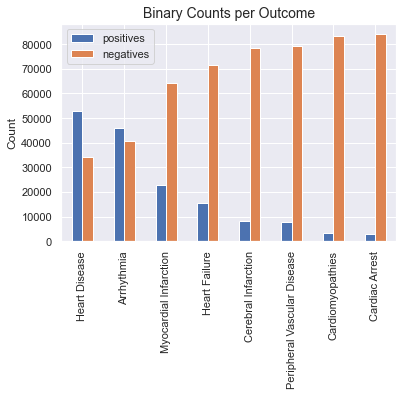

In [40]:
df_sorted= df_outs.sort_values('positives', ascending=False)
df_sorted.plot(x='outcome',y=['positives', 'negatives'], kind='bar')
plt.ylabel('Count')
plt.xlabel(' ')
plt.title('Binary Counts per Outcome', fontsize=14)
plt.savefig('charts/outcome_binary_counts_bar.png', bbox_inches='tight')

### Proxy Variables

In [ ]:
# from sklearn.model_selection import RepeatedKFold
# from sklearndf.pipeline import RegressorPipelineDF
# from sklearndf.regression import RandomForestRegressorDF

# from facet.data import Sample
# from facet.selection import LearnerRanker, LearnerGrid

# sample = Sample(observations=df2.iloc[:,:61], target_name='31-0.0')

# # create a (trivial) pipeline for a random forest regressor
# rnd_forest_reg = RegressorPipelineDF(
#     regressor=RandomForestRegressorDF(n_estimators=200, random_state=42)
# )

# # define grid of models which are "competing" against each other
# rnd_forest_grid = [
#     LearnerGrid(
#         pipeline=rnd_forest_reg,
#         learner_parameters={
#             "min_samples_leaf": [8, 11, 15],
#             "max_depth": [4, 5, 6],
#         }
#     ),
# ]

# # create repeated k-fold CV iterator
# rkf_cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)

# # rank your candidate models by performance (default is mean CV score - 2*SD)
# ranker = LearnerRanker(grids=rnd_forest_grid, cv=rkf_cv, n_jobs=-3).fit(sample=df2.iloc[:,:61])

# # get summary report
# ranker.summary_report()